# Azure Batch - G2


## Domain:
#### Automobile Industry

## About:
#### The XYZ automobile company in India wants to enter the business of selling used cars. They would like to analyse the business challenges before the venture. 


#### Importing all the libraries

In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None 
from IPython.display import display
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

#### Importing File Car_Sales CSV File and displaying first 5 entries of our Data Set

In [2]:
car_data = pd.read_csv('Car_sales_transactions.csv', sep=",",header = 0, encoding='latin')
car_data.head()

,Sales_ID,Name,Year,Selling_Price,km_Driven,City_Code,State_Code,Postal_Code,Fuel,Seller_Type,Transmission,Owner,Mileage,Engine,Max_Power,Seats
0,1,Maruti Swift Dzire VDI,2014,450000,145500,CT01,ST15,400001,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,CT28,ST11,834001,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5
2,3,Honda City 2017-2020 EXi,2006,158000,140000,CT12,ST28,201301,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,CT21,ST27,248001,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5
4,5,Maruti Swift VXI BSIII,2007,130000,120000,CT03,ST24,600020,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5


In [3]:
car_data.shape

(7906, 16)

#### Displaying all the column names.

In [4]:
car_data.columns

Index(['Sales_ID', 'Name', 'Year', 'Selling_Price', 'km_Driven', 'City_Code',
       'State_Code', 'Postal_Code', 'Fuel', 'Seller_Type', 'Transmission',
       'Owner', 'Mileage', 'Engine', 'Max_Power', 'Seats'],
      dtype='object')

#### Importing data from Sales Status and City Master File and merging it with the data and displaying first five entries

In [5]:
sales_status = pd.read_csv('Sales_Status.csv')
city_master = pd.read_excel('City_Master.xlsx')
region = pd.read_excel('Region_Master.xlsx')
region_state = pd.read_excel('Region_State_Mapping.xlsx')
state = pd.read_excel('State_Master.xlsx')
car_data = pd.merge(car_data,city_master[['City_Code','City_Name']],how ='left',on='City_Code')
car_data = pd.merge(car_data,region_state, how ='left',on='State_Code')
car_data = pd.merge(car_data,sales_status, how = 'left', on='Sales_ID')
car_data = pd.merge(car_data,state, how = 'left', on='State_Code')
car_data = pd.merge(car_data,region, how = 'left', on='Region_Code')
car_data.head()


,Sales_ID,Name,Year,Selling_Price,km_Driven,City_Code,State_Code,Postal_Code,Fuel,Seller_Type,...,Owner,Mileage,Engine,Max_Power,Seats,City_Name,Region_Code,Sold,State_Name,Region
0,1,Maruti Swift Dzire VDI,2014,450000,145500,CT01,ST15,400001,Diesel,Individual,...,First Owner,23.4 kmpl,1248 CC,74 bhp,5,Mumbai,R3,Y,Maharashtra,West
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,CT28,ST11,834001,Diesel,Individual,...,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5,Ranchi,R2,Y,Jharkhand,East
2,3,Honda City 2017-2020 EXi,2006,158000,140000,CT12,ST28,201301,Petrol,Individual,...,Third Owner,17.7 kmpl,1497 CC,78 bhp,5,Noida,R1,Y,Uttar Pradesh,Central
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,CT21,ST27,248001,Diesel,Individual,...,First Owner,23.0 kmpl,1396 CC,90 bhp,5,Dehradun,R1,Y,Uttarakhand,Central
4,5,Maruti Swift VXI BSIII,2007,130000,120000,CT03,ST24,600020,Petrol,Individual,...,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5,Chennai,R4,Y,Tamil Nadu,South


#### Checking the datatypes of our dataset

In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 7905
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales_ID       7906 non-null   int64 
 1   Name           7906 non-null   object
 2   Year           7906 non-null   int64 
 3   Selling_Price  7906 non-null   int64 
 4   km_Driven      7906 non-null   int64 
 5   City_Code      7906 non-null   object
 6   State_Code     7906 non-null   object
 7   Postal_Code    7906 non-null   int64 
 8   Fuel           7906 non-null   object
 9   Seller_Type    7906 non-null   object
 10  Transmission   7906 non-null   object
 11  Owner          7906 non-null   object
 12  Mileage        7906 non-null   object
 13  Engine         7906 non-null   object
 14  Max_Power      7906 non-null   object
 15  Seats          7906 non-null   int64 
 16  City_Name      7906 non-null   object
 17  Region_Code    7906 non-null   object
 18  Sold           7906 non-null

#### Coverting Mileage, Power and Engine from String to Float Values

In [7]:
car_data['Mileage_float'] = car_data['Mileage'].str[:-5]
car_data['Power'] = car_data['Max_Power'].str[:-4]
car_data['Mileage_float'] = car_data['Mileage_float'].apply(pd.to_numeric)
car_data['Power'] = car_data['Power'].apply(pd.to_numeric)
car_data['Power']
car_data['Engine_cc'] = car_data['Engine'].str.split(pat=" ",expand=True)[0].astype(int)

#### After converting checking the data types again 

In [8]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 7905
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales_ID       7906 non-null   int64  
 1   Name           7906 non-null   object 
 2   Year           7906 non-null   int64  
 3   Selling_Price  7906 non-null   int64  
 4   km_Driven      7906 non-null   int64  
 5   City_Code      7906 non-null   object 
 6   State_Code     7906 non-null   object 
 7   Postal_Code    7906 non-null   int64  
 8   Fuel           7906 non-null   object 
 9   Seller_Type    7906 non-null   object 
 10  Transmission   7906 non-null   object 
 11  Owner          7906 non-null   object 
 12  Mileage        7906 non-null   object 
 13  Engine         7906 non-null   object 
 14  Max_Power      7906 non-null   object 
 15  Seats          7906 non-null   int64  
 16  City_Name      7906 non-null   object 
 17  Region_Code    7906 non-null   object 
 18  Sold    

## Check Point 1

## Task 1.1(Data Manipulation using Python) 

### Q1 How the sold cars depend on the Fuel, Mileage, Power and Selling Price.
##### We found that Dieseled Cars are having high Power but less Mileage

In [9]:
car_data.query("Sold =='Y'").groupby(['Sold','Fuel']).agg({'Mileage_float':np.mean,'Power':np.mean}).sort_values(['Fuel'],ascending = False)

Mileage_float       Power
Sold Fuel                             
Y    Petrol      18.995936   81.794000
     LPG         21.108333   58.616667
     Diesel      19.366492  101.923108
     CNG         25.314286   56.080000

##### Then Comapred the Fuel with the Selling Price and Car Driven
##### We Concluded that Selling Price of Cars are more which are having more Power and Selling Price of Diseled Car is more.

In [10]:
car_data.groupby(['Fuel','Sold']).agg({'Mileage_float':np.mean,'Power':np.mean,'km_Driven':np.mean,'Selling_Price':np.mean}).sort_values(['Fuel'],ascending = False)

Mileage_float       Power     km_Driven  Selling_Price
Fuel   Sold                                                        
Petrol N         19.113540   79.585652  51883.683946  462360.887814
       Y         18.995936   81.794000  51532.865241  501153.604278
LPG    N         18.053448   59.479310  87275.310345  212896.551724
       Y         21.108333   58.616667  96500.000000  201166.666667
Diesel N         19.732088  101.451224  83124.325839  791287.744995
       Y         19.366492  101.923108  83923.622624  836903.476236
CNG    N         24.281778   61.757333  67459.355556  311022.177778
       Y         25.314286   56.080000  52142.857143  362142.714286

##### Which type of fueled cars are Sold more ? 
##### If comparing the more number of cars sold are of Diesel but percentage of sold cars is more of Petrol Cars.

In [11]:
group_column = 'Fuel'
display_name = 'Fuel'
group_df = car_data.groupby([group_column,'Sold'],as_index=False).agg({'Name':'count'})
group_df = group_df.pivot(index=group_column,columns='Sold',values='Name').fillna(0)
group_df['Total'] = group_df['N'] + group_df['Y']
group_df['% Sold'] = ((group_df['Y'] / group_df['Total'])*100).round(2)
group_df.sort_values(by='% Sold',ascending=False, inplace=True)
group_df.reset_index(inplace=True)
group_df.rename(columns={'Y':'Sold',group_column:display_name,'N':'Not Sold'},inplace=True)
display(group_df)

Sold,Fuel,Not Sold,Sold,Total,% Sold
0,Petrol,2585,935,3520,26.56
1,Diesel,3247,1052,4299,24.47
2,LPG,29,6,35,17.14
3,CNG,45,7,52,13.46


### Q2 How is Fuel related to Brand?

##### Extract the brand from the Name of the Cars

In [12]:
brand = car_data['Name'].str.split(expand = True)
# print(brand)
car_data['Brand'] = brand[0]

##### With the below query we tried to extract the brands of which type of Fueled cars are Sold.
##### After that we concluded that Sales of the most of the Dieseled cars are more of all the Brands

In [13]:
car_data.query("Sold == 'Y'").groupby(['Brand','Fuel']).agg({'Fuel':np.size}).rename(columns={'Fuel':'No of sold Cars'})


No of sold Cars
Brand         Fuel                   
Audi          Diesel                9
BMW           Diesel               27
              Petrol                2
Chevrolet     Diesel               32
              Petrol               24
Daewoo        Petrol                1
Datsun        Petrol               16
Fiat          Diesel                6
Force         Diesel                1
Ford          Diesel               65
              Petrol               27
Honda         Diesel               30
              Petrol               94
Hyundai       Diesel              124
              LPG                   1
              Petrol              207
Jaguar        Diesel               21
Jeep          Diesel                5
              Petrol                4
Kia           Diesel                2
Land          Diesel                1
Lexus         Petrol               11
MG            Petrol                2
Mahindra      Diesel              191
              Petrol               10
Maruti        CNG                   7
              Diesel              201
              LPG                   5
              Petrol              384
Mercedes-Benz Diesel               14
              Petrol                2
Mitsubishi    Diesel                3
Nissan        Diesel               17
              Petrol               16
Renault       Diesel               21
              Petrol               35
Skoda         Diesel                8
              Petrol               12
Tata          Diesel              141
              Petrol               37
Toyota        Diesel               88
              Petrol               38
Volkswagen    Diesel               27
              Petrol               12
Volvo         Diesel               18
              Petrol                1

### Q3 Which brands are selling most?
##### Based on the below Query we concluded Maruti Car Brands are sold more

In [14]:
car_data.query("Sold == 'Y'").groupby(['Brand']).agg({'Sold':np.size}).rename(columns={'Sold':'NoOfCarsSold'}).sort_values(['NoOfCarsSold'],ascending=False)

,NoOfCarsSold
Brand,
Maruti,597
Hyundai,332
Mahindra,201
Tata,178
Toyota,126
Honda,124
Ford,92
Chevrolet,56
Renault,56


##### Further we found most of the Maruti Cars are Sold in Mangalore

In [15]:
#No of cars sold brandwise on each region by brand
car_data.query("Sold == 'Y' and Brand == 'Maruti'").groupby(['Brand','City_Name'],as_index=False).size().rename(columns={'size':'Total_Sold'}).sort_values('Total_Sold',ascending = False).reset_index(drop=True)

,Brand,City_Name,Total_Sold
0,Maruti,Mangalore,32
1,Maruti,Dehradun,30
2,Maruti,Surat,27
3,Maruti,Hyderabad,25
4,Maruti,Kochi,25
5,Maruti,Vellore,24
6,Maruti,Mumbai,24
7,Maruti,Mysore,23
8,Maruti,Gangtok,23
9,Maruti,Noida,23


##### Compared how the Sold Cars Brands are related to the Selleing Price and which type of brands are sold more comparing individually.

In [16]:
car_sold = car_data.query("Sold == 'Y'").groupby(['Brand'], as_index=False).agg({'Selling_Price':np.mean,'Sold':np.size}).sort_values(['Selling_Price','Brand'],ascending=False)
car_sold['Total'] = 0
for ind in car_sold.index:
    car_sold['Total'][ind] = car_data[car_data['Brand']==car_sold['Brand'][ind]].shape[0]
car_sold['Percentage'] = (car_sold['Sold']/car_sold['Total'])*100
car_sold['Selling_Price'] = car_sold['Selling_Price']/100000
car_sold.rename(columns={'Selling_Price':'Selling_Price (in lakhs)'}).sort_values('Percentage',ascending=False).reset_index(drop = True)


,Brand,Selling_Price (in lakhs),Sold,Total,Percentage
0,MG,18.250000,2,3,66.666667
1,Kia,12.715000,2,4,50.000000
2,Nissan,4.209696,33,81,40.740741
3,Daewoo,1.000000,1,3,33.333333
4,Lexus,51.500000,11,34,32.352941
5,Mercedes-Benz,27.671875,16,54,29.629630
6,Jaguar,29.178571,21,71,29.577465
7,Jeep,25.516666,9,31,29.032258
8,Volvo,35.473684,19,67,28.358209
9,Toyota,10.855555,126,452,27.876106


### Q4 Are there specific locations selling more?
##### We concluded most of the cars are sold in Mysore individually as well as by comparing the other locations as well

In [17]:
car_city = car_data.query("Sold == 'Y'").groupby(['Region','State_Name','City_Name']).agg({'Sold':np.size}).sort_values(['Sold'],ascending=False)
car_city['Total'] = 0
car_city['Percentage'] = 0
for index in car_city.index:
    car_city['Total'][index] = car_data[car_data['City_Name'] == index[2]].shape[0]
car_city['Percentage']= (car_city['Sold']/car_city['Total'])*100
car_city.sort_values('Percentage',ascending=False)

Sold  Total  Percentage
Region     State_Name     City_Name                            
South      Karnataka      Mysore          83    279   29.749104
West       Gujarat        Surat           70    242   28.925620
South      Tamil Nadu     Vellore         81    293   27.645051
           Telangana      Hyderabad       72    262   27.480916
           Karnataka      Mangalore       76    279   27.240143
Central    Madhya Pradesh Indore          69    257   26.848249
North East Sikkim         Gangtok         69    257   26.848249
East       Bihar          Patna           69    257   26.848249
Central    Uttar Pradesh  Noida           80    303   26.402640
East       Jharkhand      Jamshedpur      65    247   26.315789
Central    Uttar Pradesh  kanpur          65    247   26.315789
South      Tamil Nadu     Coimbatore      77    294   26.190476
West       Gujarat        Ahmedabad       72    278   25.899281
           Maharashtra    Mumbai          77    298   25.838926
East       West Bengal    Kolkata         69    268   25.746269
North      Punjab         Ludhiana        63    249   25.301205
South      Tamil Nadu     Chennai         72    285   25.263158
           Kerala         Thrissur        68    270   25.185185
East       Odisha         Bhubaneshwar    64    255   25.098039
Central    Uttarakhand    Dehradun        70    280   25.000000
North      Delhi          Delhi           80    320   25.000000
West       Gujarat        Vadodara        66    272   24.264706
South      Andhra Pradesh Nellore         68    281   24.199288
           Karnataka      Bangalore       64    276   23.188406
East       Jharkhand      Ranchi          62    276   22.463768
South      Kerala         Kochi           62    279   22.222222
West       Maharashtra    Aurangabad      60    278   21.582734
                          Pune            52    250   20.800000
North      Rajasthan      Jaipur          55    274   20.072993

### Q5 Which factors which might help in Selling Prices ?

##### Type of Owners are also impacting Selling_Price of Cars

In [18]:
# car_data['Selling_Price'] = car_data['Selling_Price']/100000
car_owner = car_data.groupby(['Owner']).agg({'Selling_Price':(np.mean)}).sort_values(['Selling_Price'],ascending=False)
car_owner['Selling_Price'] = car_owner['Selling_Price']/100000
car_owner.rename(columns = {'Selling_Price':'Selling_Price(in lakhs)'})

,Selling_Price(in lakhs)
Owner,
Test Drive Car,44.038000
First Owner,7.899799
Second Owner,4.012035
Third Owner,2.931873
Fourth & Above Owner,2.331968


##### with the below query we concluded engine of which range of cars are Sold more

In [19]:
start = 600
end = 3800
bin_size = 200
bin_count = int((end-start)/bin_size)+1
bin_range = np.linspace(start,end,bin_count)
car_data['Engine_cc_bin'] = pd.cut(car_data['Engine_cc'], bins=bin_range).astype(str)
group_column = 'Engine_cc_bin'
display_name = 'Engine'
slice_df = car_data[(car_data['Selling_Price'].notnull()) & (car_data[group_column].notnull())]
group_df = slice_df.groupby([group_column,'Sold'],as_index=False).agg({'Selling_Price':'mean'})
group_df = group_df.pivot(index=group_column,columns='Sold',values='Selling_Price').fillna(0)
group_df.reset_index(inplace=True)
group_df['Y'] = (group_df['Y']/1000).astype(int)
group_df['N'] = (group_df['N']/1000).astype(int)
group_df.rename(columns={'Y':'Price (k) Sold',group_column:display_name,'N':'Price (k) Not Sold'},inplace=True)
group_df.sort_values(by='Engine',inplace=True)
display(group_df)

Sold,Engine,Price (k) Not Sold,Price (k) Sold
0,"(1000.0, 1200.0]",441,455
1,"(1200.0, 1400.0]",480,474
2,"(1400.0, 1600.0]",569,563
3,"(1600.0, 1800.0]",965,761
4,"(1800.0, 2000.0]",2388,2908
5,"(2000.0, 2200.0]",850,847
6,"(2200.0, 2400.0]",1287,773
7,"(2400.0, 2600.0]",955,960
8,"(2600.0, 2800.0]",1395,1907
9,"(2800.0, 3000.0]",1939,1923


##### Input Checklist for User based on the Inputs

In [20]:
paramter_check = ['Brand','Year','Name','Region','State_Name','City_Name','Seller_Type','km_Driven','Fuel','Engine','Seats','Transmission','Owner','Mileage','Max_Power']

km_Driven_range = [0,5000, 10000, 20000, 40000, 80000,160000,200000,250000,np.inf]

names = ['0-5K', '5K-10K', '10K-20K', '20K-40K', '40K-80K','80K-160K','160K-200K','200K-250K','250K+']

car_model_range = [0,1999,2005, 2011, 2015,2018,np.inf]

names_model = ['Antique(upto 1999)', 'Very Old(2000-2005)', 'Old(2006-2011)','Moderate(2012-2015)','Fair(2016-2018)','New(2019+)']

# car_min_selling_price = car_data.copy()
car_min_selling_price = car_data.query("Sold == 'Y'").groupby(paramter_check,as_index=False).agg({'Selling_Price':np.min}).rename(columns={'Selling_Price':'Min_Selling_Price_in_lakhs'}).sort_values(by=['Name','km_Driven'],ascending=[True,True])
car_min_selling_price.Min_Selling_Price_in_lakhs = car_min_selling_price.Min_Selling_Price_in_lakhs/100000

car_min_selling_price['km_Driven_range'] = pd.cut(car_min_selling_price['km_Driven'], km_Driven_range, labels=names)

car_min_selling_price['approx_Mileage'] = car_min_selling_price['Mileage'].str.split(' ', 1).str[0].astype('float64').apply(np.ceil)
# car_min_selling_price
car_min_selling_price['approx_Mileage'] = car_min_selling_price['approx_Mileage'].astype('str')
car_min_selling_price.km_Driven_range = car_min_selling_price.km_Driven_range.astype('object')
# car_min_selling_price.car_model_range = car_min_selling_price.car_model_range.astype('object')

car_min_selling_price['car_model_range'] = pd.cut(car_min_selling_price['Year'], car_model_range, labels=names_model)
# paramter_check = ['Brand','Year','Name','Region','State_Name','City_Name','Seller_Type','km_Driven','Fuel','Engine','Seats','Transmission','Owner','Mileage','Max_Power']
car_min_selling_price.car_model_range = car_min_selling_price.car_model_range.astype('object')


# car_min_selling_price.info()
input_dict = {'Brand':'Maruti','Fuel':'Diesel','approx_Mileage':'25.0'}
# input_check = ['Brand','Year','Name','Seller_Type','km_Driven','Mileage','Max_Power','Fuel','Engine','Seats','Transmission']
input_check = ['Brand','Year','Name','Seller_Type','km_Driven','Mileage','Max_Power','Fuel','Engine','Seats','Transmission','Owner']
#creating dynamic dataframe from the car_min_selling_price dataframe with the user input paramters to display minimum selling price for all brands
car_input_min_selling_price = car_min_selling_price[(car_min_selling_price[''.join(list(input_dict.keys())[0])]==''.join(list(input_dict.values())[0])) & (car_min_selling_price[''.join(list(input_dict.keys())[1])]==''.join(list(input_dict.values())[1])) & (car_min_selling_price[''.join(list(input_dict.keys())[2])]==''.join(list(input_dict.values())[2]))]
pd.pivot_table(car_input_min_selling_price,values=['Min_Selling_Price_in_lakhs'],index =input_check,columns=['car_model_range','km_Driven_range']).head(10).fillna(0).sort_values(by =['Year','Name'],ascending=[True,True])


Min_Selling_Price_in_lakhs  \
car_model_range                                                                                                                                          Fair(2016-2018)   
km_Driven_range                                                                                                                                                     0-5K   
Brand  Year Name                                    Seller_Type km_Driven Mileage    Max_Power Fuel   Engine  Seats Transmission Owner                                     
Maruti 2016 Maruti Ertiga SHVS LDI Option           Individual  70000     24.52 kmpl 88.5 bhp  Diesel 1248 CC 7     Manual       Second Owner                        0.0   
            Maruti Ertiga SHVS VDI                  Individual  70000     24.52 kmpl 88.5 bhp  Diesel 1248 CC 7     Manual       Second Owner                        0.0   
                                                                80000     24.52 kmpl 88.5 bhp  Diesel 1248 CC 7     Manual       First Owner                         0.0   
            Maruti Ertiga SHVS ZDI Plus             Individual  70000     24.52 kmpl 88.5 bhp  Diesel 1248 CC 7     Manual       First Owner                         0.0   
            Maruti Vitara Brezza VDi                Individual  70000     24.3 kmpl  88.5 bhp  Diesel 1248 CC 5     Manual       First Owner                         0.0   
            Maruti Vitara Brezza ZDi Plus           Dealer      63000     24.3 kmpl  88.5 bhp  Diesel 1248 CC 5     Manual       First Owner                         0.0   
            Maruti Vitara Brezza ZDi Plus Dual Tone Individual  60000     24.3 kmpl  88.5 bhp  Diesel 1248 CC 5     Manual       First Owner                         0.0   
                                                                90000     24.3 kmpl  88.5 bhp  Diesel 1248 CC 5     Manual       First Owner                         0.0   
                                                                110000    24.3 kmpl  88.5 bhp  Diesel 1248 CC 5     Manual       Second Owner                        0.0   
       2017 Maruti Ertiga SHVS VDI                  Individual  80000     24.52 kmpl 88.5 bhp  Diesel 1248 CC 7     Manual       First Owner                         0.0   

                                                                                                                                                       \
car_model_range                                                                                                                                         
km_Driven_range                                                                                                                               10K-20K   
Brand  Year Name                                    Seller_Type km_Driven Mileage    Max_Power Fuel   Engine  Seats Transmission Owner                  
Maruti 2016 Maruti Ertiga SHVS LDI Option           Individual  70000     24.52 kmpl 88.5 bhp  Diesel 1248 CC 7     Manual       Second Owner     0.0   
            Maruti Ertiga SHVS VDI                  Individual  70000     24.52 kmpl 88.5 bhp  Diesel 1248 CC 7     Manual       Second Owner     0.0   
                                                                80000     24.52 kmpl 88.5 bhp  Diesel 1248 CC 7     Manual       First Owner      0.0   
            Maruti Ertiga SHVS ZDI Plus             Individual  70000     24.52 kmpl 88.5 bhp  Diesel 1248 CC 7     Manual       First Owner      0.0   
            Maruti Vitara Brezza VDi                Individual  70000     24.3 kmpl  88.5 bhp  Diesel 1248 CC 5     Manual       First Owner      0.0   
            Maruti Vitara Brezza ZDi Plus           Dealer      63000     24.3 kmpl  88.5 bhp  Diesel 1248 CC 5     Manual       First Owner      0.0   
            Maruti Vitara Brezza ZDi Plus Dual Tone Individual  60000     24.3 kmpl  88.5 bhp  Diesel 1248 CC 5     Manual       First Owner      0.0   
                                                  

## Task 1.3 (Statistical Analysis using Python)

### Q1 Descriptive statistics for both numerical and categorical and draw few insights from them.

In [21]:
car_data.describe(include='all')


,Sales_ID,Name,Year,Selling_Price,km_Driven,City_Code,State_Code,Postal_Code,Fuel,Seller_Type,...,City_Name,Region_Code,Sold,State_Name,Region,Mileage_float,Power,Engine_cc,Brand,Engine_cc_bin
count,7906.000000,7906,7906.000000,7.906000e+03,7.906000e+03,7906,7906,7906.000000,7906,7906,...,7906,7906,7906,7906,7906,7906.000000,7906.000000,7906.000000,7906,7906
unique,NaN,1982,NaN,NaN,NaN,29,18,NaN,4,3,...,29,6,2,18,6,NaN,NaN,NaN,31,15
top,NaN,Maruti Swift Dzire VDI,NaN,NaN,NaN,CT09,ST24,NaN,Diesel,Individual,...,Delhi,R4,N,Tamil Nadu,South,NaN,NaN,NaN,Maruti,"(1000.0, 1200.0]"
freq,NaN,129,NaN,NaN,NaN,320,872,NaN,4299,6563,...,320,2798,5906,872,2798,NaN,NaN,NaN,2367,1786
mean,4070.106248,NaN,2013.983936,6.498137e+05,6.918866e+04,NaN,NaN,503562.180116,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19.419861,91.587374,1458.708829,NaN,NaN
std,2345.770159,NaN,3.863695,8.135827e+05,5.679230e+04,NaN,NaN,204939.677172,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.036263,35.747216,503.893057,NaN,NaN
min,1.000000,NaN,1994.000000,2.999900e+04,1.000000e+00,NaN,NaN,110001.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,32.800000,624.000000,NaN,NaN
25%,2037.250000,NaN,2012.000000,2.700000e+05,3.500000e+04,NaN,NaN,391510.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.780000,68.050000,1197.000000,NaN,NaN
50%,4076.500000,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,524225.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19.300000,82.000000,1248.000000,NaN,NaN
75%,6102.000000,NaN,2017.000000,6.900000e+05,9.542500e+04,NaN,NaN,680001.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,22.320000,102.000000,1582.000000,NaN,NaN


##### How Selling Price of Cars are related with time (Year)
##### As per the below query we saw with the increae in th number of sold Cars selling Price of Cars also increased with time.

In [22]:
car_year = car_data.groupby(['Year']).agg({'Selling_Price':np.mean}).sort_values(['Year'])
car_sold_year = car_data.query("Sold == 'Y'").groupby(['Year']).agg({'Sold':np.size}).sort_values(['Year'])
car_year['Selling_Price_diff'] = 0
car_year['Selling_Price_diff_per'] = 0
prv = car_year['Selling_Price'].head(1)
index = car_year['Selling_Price'].head(1).index
car_year['Selling_Price_diff'][index[0]] = 0
for index in car_year.index:
    car_year['Selling_Price_diff'][index] = float(car_year['Selling_Price'][index])-prv
    prv = car_year['Selling_Price'][index]
    car_year['Selling_Price_diff_per'][index] = (car_year['Selling_Price_diff'][index])/(prv)*100
car_year.sort_values(['Year'],ascending=False)

car_data.query("Sold == 'Y' and Year == index").shape[0]
car_year['Cars_Sold'] = 0
for index in car_year.index:
    if index in car_sold_year.index:
        car_year['Cars_Sold'][index] = car_sold_year['Sold'][index]
car_year['Selling_Price'] = car_year['Selling_Price']/100000
car_year.rename(columns= {'Selling_Price':'Selling_Price(in lakhs)','Selling_Price_diff':'Impact on Selling Price w.r.t previous Year','Selling_Price_diff_per':'% Increase/Decrease in Selling Price'}).sort_values(['Year'],ascending=False)

,Selling_Price(in lakhs),Impact on Selling Price w.r.t previous Year,% Increase/Decrease in Selling Price,Cars_Sold
Year,,,,
2020,8.852702,-891716,-100,19
2019,17.769863,818802,46,154
2018,9.581836,67990,7,187
2017,8.901930,189875,21,256
2016,7.003177,103547,14,225
2015,5.967703,80094,13,200
2014,5.166757,56011,10,144
2013,4.606646,107521,23,174
2012,3.531433,31046,8,159


##### With the increase in time Number of Sold Cars of Automatic Cars also Increasing.

In [23]:
car_data.query("Sold == 'Y'").groupby(['Year','Transmission']).agg({'Sold':np.size}).rename(columns = {'Sold':'No. of Sold Cars'}).sort_values(['Year','Transmission'],ascending=False)


No. of Sold Cars
Year Transmission                  
2020 Manual                      15
     Automatic                    4
2019 Manual                      79
     Automatic                   75
2018 Manual                     138
     Automatic                   49
2017 Manual                     208
     Automatic                   48
2016 Manual                     183
     Automatic                   42
2015 Manual                     185
     Automatic                   15
2014 Manual                     135
     Automatic                    9
2013 Manual                     160
     Automatic                   14
2012 Manual                     154
     Automatic                    5
2011 Manual                     146
     Automatic                    9
2010 Manual                      91
     Automatic                    5
2009 Manual                      66
     Automatic                    5
2008 Manual                      42
     Automatic                    1
2007 Manual                      26
     Automatic                    2
2006 Manual                      22
     Automatic                    1
2005 Manual                      24
     Automatic                    1
2004 Manual                      12
     Automatic                    1
2003 Manual                      10
2002 Manual                       7
2001 Manual                       2
2000 Manual                       5
1999 Manual                       3
1994 Manual                       1

### Anova Testing

In [24]:
iv = 'City_Name'
dv = 'Selling_Price'
model = ols(f'{dv} ~ C({iv})', data=car_data[car_data['Sold']=='Y'][[iv,dv]]).fit()
aov_table = sm.stats.anova_lm(model, typ=2) 
display(aov_table)

if aov_table.iloc[0]['PR(>F)'] < .025:
    print(f"We reject the hypothesis that {iv} don't have any impact on Selling Price")
else: 
    print(f"We cannot reject the hypothesis that {iv} don't have any impact on Selling Price")

,sum_sq,df,F,PR(>F)
C(City_Name),2.041014e+13,28.0,0.928303,0.573457
Residual,1.547694e+15,1971.0,NaN,NaN


We cannot reject the hypothesis that City_Name don't have any impact on Selling Price


In [25]:
iv = 'Fuel'
dv = 'Selling_Price'
model = ols(f'{dv} ~ C({iv})', data=car_data[car_data['Sold']=='Y'][[iv,dv]]).fit()
aov_table = sm.stats.anova_lm(model, typ=2) 

if aov_table.iloc[0]['PR(>F)'] < .05:
    print(f"We reject the hypothesis that {iv} don't have any impact on Selling Price")
else: 
    print(f"We cannot reject the hypothesis that {iv} don't have any impact on Selling Price")

We reject the hypothesis that Fuel don't have any impact on Selling Price


In [26]:
iv = 'Transmission'
dv = 'Selling_Price'
model = ols(f'{dv} ~ C({iv})', data=car_data[car_data['Sold']=='Y'][[iv,dv]]).fit()
aov_table = sm.stats.anova_lm(model, typ=2) 
if aov_table.iloc[0]['PR(>F)'] < .05:
    print(f"We reject the hypothesis that {iv} don't have any impact on Selling Price")
else: 
    print(f"We cannot reject the hypothesis that {iv} don't have any impact on Selling Price")

We reject the hypothesis that Transmission don't have any impact on Selling Price


In [27]:
iv = 'Owner'
dv = 'Selling_Price'
model = ols(f'{dv} ~ C({iv})', data=car_data[car_data['Sold']=='Y'][[iv,dv]]).fit()
aov_table = sm.stats.anova_lm(model, typ=2) 
# display(aov_table)

if aov_table.iloc[0]['PR(>F)'] < .05:
    print(f"We reject the hypothesis that {iv} don't have any impact on Selling Price")
else: 
    print(f"We cannot reject the hypothesis that {iv} don't have any impact on Selling Price")

We reject the hypothesis that Owner don't have any impact on Selling Price


In [28]:
iv = 'Year'
dv = 'Selling_Price'
model = ols(f'{dv} ~ C({iv})', data=car_data[car_data['Sold']=='Y'][[iv,dv]]).fit()
aov_table = sm.stats.anova_lm(model, typ=2) 
# display(aov_table)

if aov_table.iloc[0]['PR(>F)'] < .05:
    print(f"We reject the hypothesis that {iv} don't have any impact on Selling Price")
else: 
    print(f"We cannot reject the hypothesis that {iv} don't have any impact on Selling Price")

We reject the hypothesis that Year don't have any impact on Selling Price


# CheckPoint 2
###### Task 2.1

In [29]:
car_data.columns

Index(['Sales_ID', 'Name', 'Year', 'Selling_Price', 'km_Driven', 'City_Code',
       'State_Code', 'Postal_Code', 'Fuel', 'Seller_Type', 'Transmission',
       'Owner', 'Mileage', 'Engine', 'Max_Power', 'Seats', 'City_Name',
       'Region_Code', 'Sold', 'State_Name', 'Region', 'Mileage_float', 'Power',
       'Engine_cc', 'Brand', 'Engine_cc_bin'],
      dtype='object')

C:\Users\lbansal\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price'>

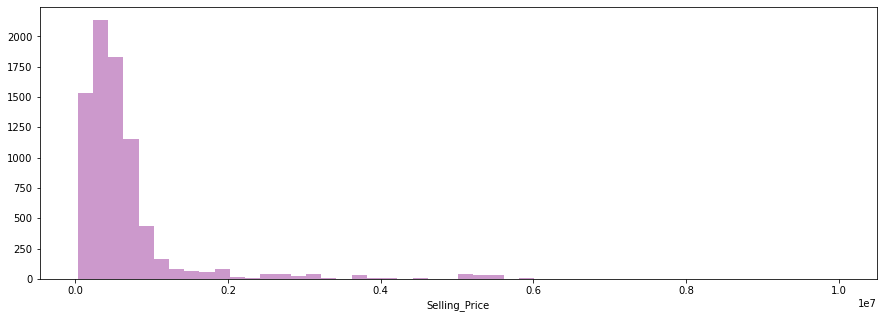

In [30]:
plt.figure(figsize=(15,5))
sns.distplot(car_data['Selling_Price'],bins=50,kde=False,color = 'purple')

In [31]:
car_data_graphs = car_data.drop(['Sales_ID','Postal_Code'],axis = 1)
pd.get_dummies(car_data_graphs['Fuel'])
car_data_graphs.corr()

,Year,Selling_Price,km_Driven,Seats,Mileage_float,Power,Engine_cc
Year,1.000000,0.412302,-0.428548,-0.007923,0.328544,0.226598,0.018263
Selling_Price,0.412302,1.000000,-0.222158,0.041617,-0.126280,0.749674,0.455682
km_Driven,-0.428548,-0.222158,1.000000,0.227259,-0.172980,-0.038159,0.206031
Seats,-0.007923,0.041617,0.227259,1.000000,-0.451700,0.191999,0.611103
Mileage_float,0.328544,-0.126280,-0.172980,-0.451700,1.000000,-0.374621,-0.576408
Power,0.226598,0.749674,-0.038159,0.191999,-0.374621,1.000000,0.703975
Engine_cc,0.018263,0.455682,0.206031,0.611103,-0.576408,0.703975,1.000000


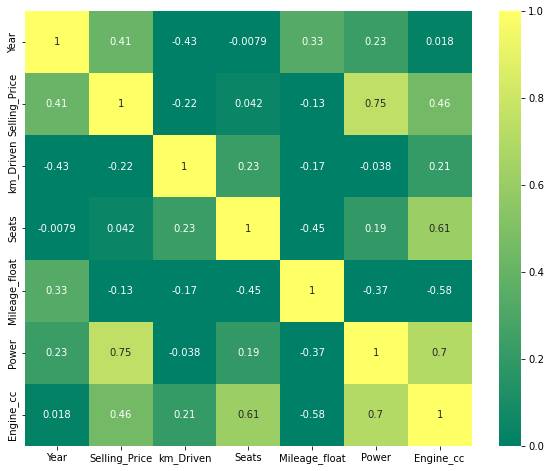

In [32]:
# sn.heatmap(car_data_graphs.corr(), annot = True)
#Correlation for numerical fields
plt.figure(figsize=(10,8))
sns.heatmap(car_data_graphs.corr(), annot=True, cmap="summer", vmin=0, vmax=1)
plt.show()

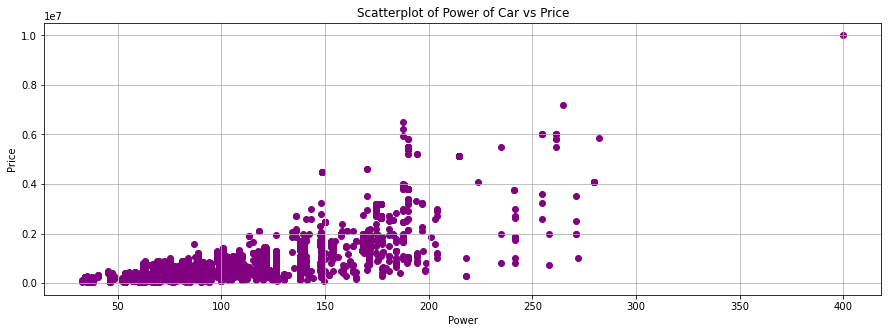

In [33]:
plt.figure(figsize=(15,5))
plt.scatter(car_data_graphs['Power'], car_data_graphs['Selling_Price'], color = "purple")
plt.title('Scatterplot of Power of Car vs Price')
plt.xlabel('Power')
plt.ylabel('Price')
plt.grid()
plt.show()

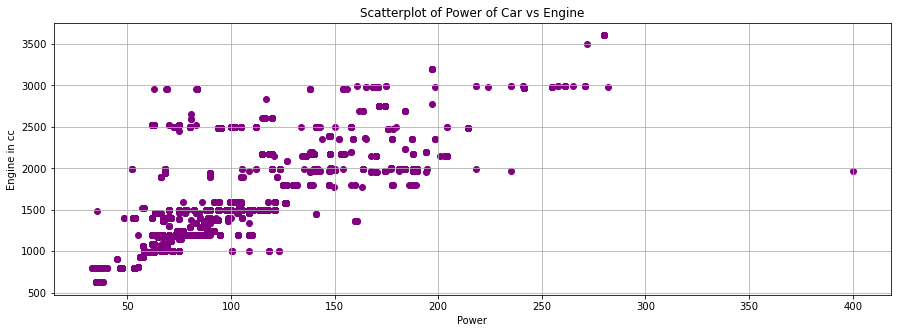

In [34]:
plt.figure(figsize=(15,5))
plt.scatter(car_data_graphs['Power'], car_data_graphs['Engine_cc'],color = "purple")
plt.title('Scatterplot of Power of Car vs Engine')
plt.xlabel('Power')
plt.ylabel('Engine in cc')
plt.grid()
plt.show()

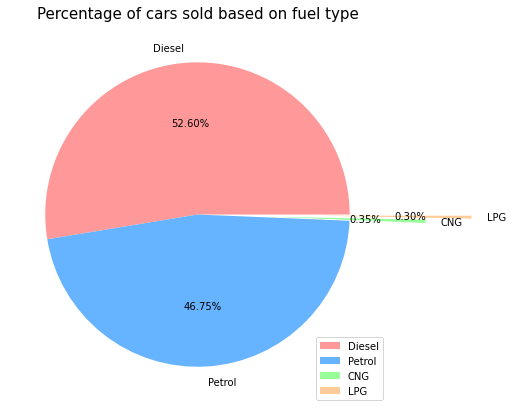

In [35]:
#Percentage of cars sold based on fuel type
Fuel_data=car_data['Fuel'].value_counts()
plt.figure(figsize=(15,7))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(car_data[car_data['Sold']=='Y']['Fuel'].value_counts(),labels=Fuel_data.index,autopct='%1.2f%%', explode = [0,0,0.5,0.8], colors = colors )
plt.title('Percentage of cars sold based on fuel type',fontsize=15)
plt.legend(loc=4)

<AxesSubplot:xlabel='Year', ylabel='Year'>

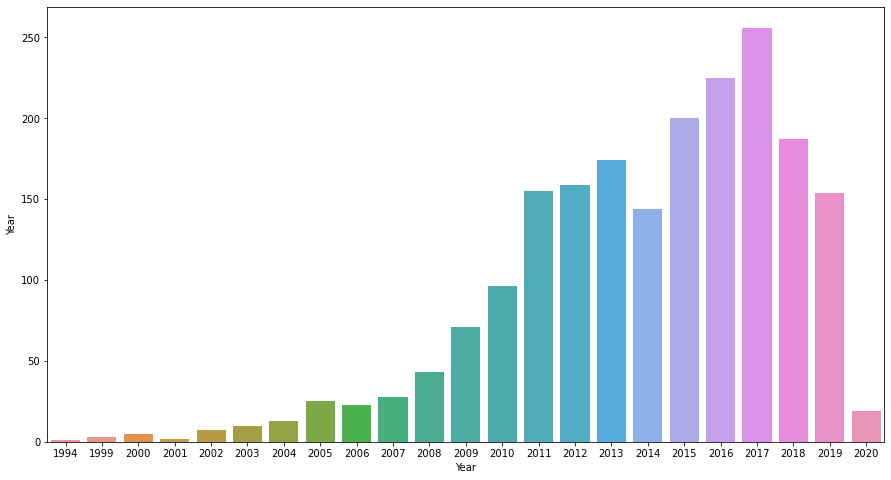

In [36]:
#No of cars sold per year
plt.figure(figsize=(15,8))
df = car_data.query("Sold == 'Y'").groupby('Year').agg({'Year':np.size})

df
sns.barplot(x=df.index, y="Year", data=df)
# # car_data[car_data['Sold']=='Y']['Year'].value_counts().plot(kind='bar',color = '#ff9999')
# plt.title("No of cars solds per year",fontsize=20)

Text(0.5, 1.0, 'TOP 10 most Selling Brands')

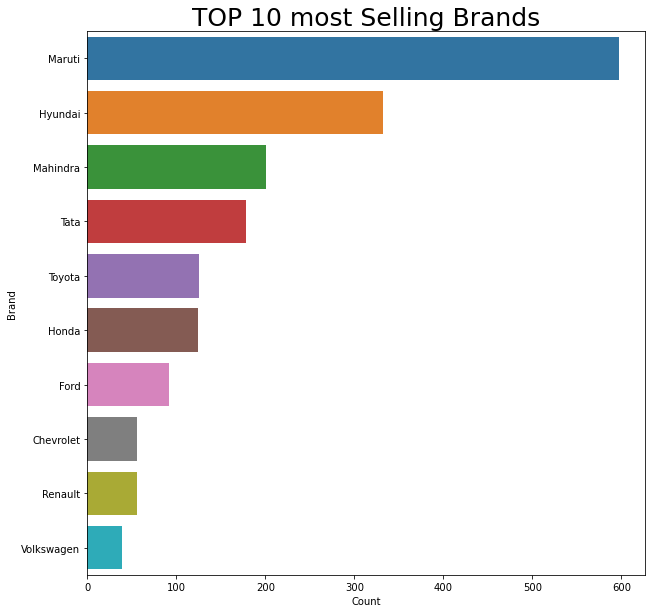

In [37]:
#TOP 10 most Selling Brands
cbrand=pd.DataFrame(car_data[car_data['Sold']=='Y'][['Brand']].value_counts().head(10),columns=['Count'])
cbrand.reset_index(inplace=True)
plt.figure(figsize=(10,10))
# sns.color_palette("pink")
sns.barplot(x='Count',y='Brand',data=cbrand)
plt.title('TOP 10 most Selling Brands',fontsize=25)

Text(0.5, 1.0, 'Count of sold cars among States')

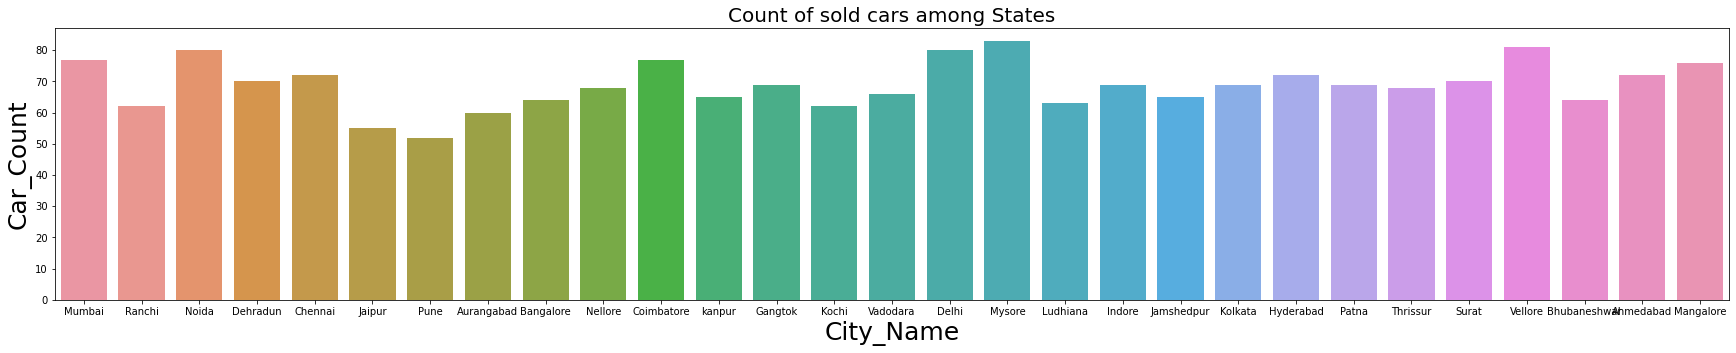

In [38]:
#count of sold cars among states
plt.figure(figsize=(30,5))
p =sns.countplot(x='City_Name',data=car_data[car_data['Sold']=='Y'])
# show_values(p)
plt.xlabel('City_Name',fontsize=25)
plt.ylabel('Car_Count',fontsize=25)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Count of sold cars among States',fontsize=20)

# figure.tight_layout()

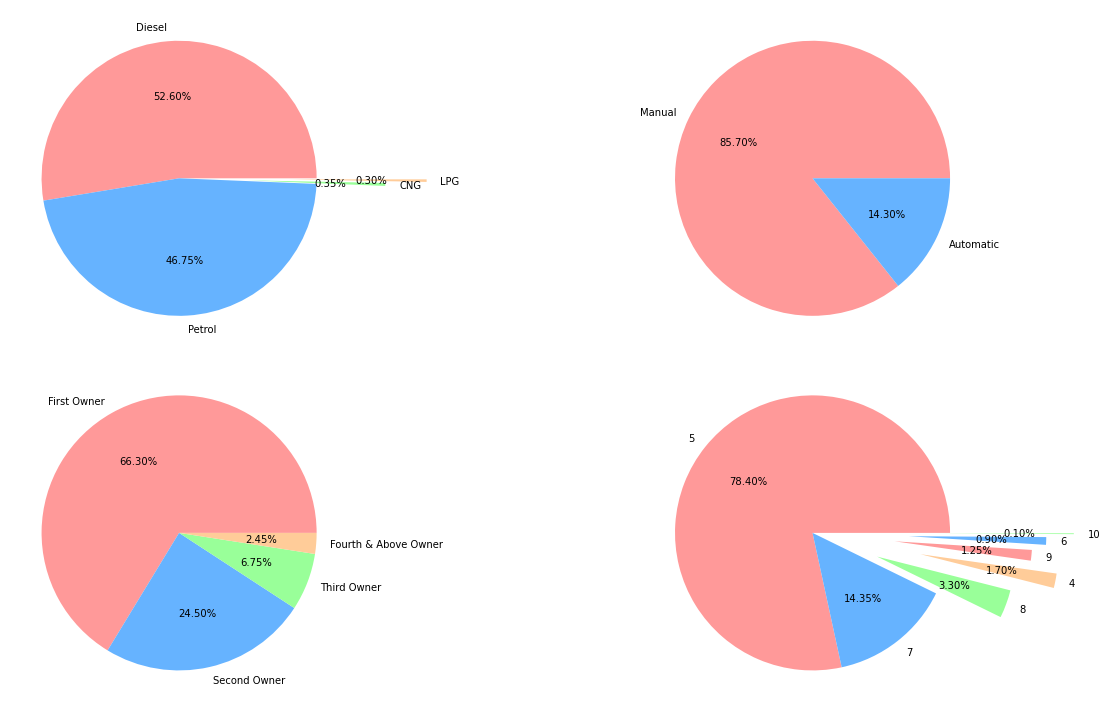

In [39]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(20,10))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
axes[0,0].pie(car_data[car_data['Sold']=='Y']['Fuel'].value_counts().values,labels = car_data[car_data['Sold']=='Y']['Fuel'].value_counts().index, autopct='%1.2f%%', explode = [0,0,0.5,0.8], colors = colors)
# axes[0,0].set_xlabel('Fuel_Type')
# axes[0,0].set_ylabel('Count')
# axes[0,0].set_title('Fuel_Type Vs Car Count',fontsize=20)

axes[0,1].pie(car_data[car_data['Sold']=='Y']['Transmission'].value_counts().values,labels = car_data[car_data['Sold']=='Y']['Transmission'].value_counts().index, autopct='%1.2f%%',  colors = colors)
# axes[0,1].set_xlabel('Transmission')
# axes[0,1].set_ylabel('Count')
# axes[0,1].set_title('Fuel_Type Vs Car Count',fontsize=20)

# axes[0,1].bar(car_data[car_data['Sold']=='Y']['Transmission'].value_counts().index,car_data[car_data['Sold']=='Y']['Transmission'].value_counts().values,color='blue')
# axes[0,1].set_xlabel('Transmission')
# axes[0,1].set_ylabel('Count')
# axes[0,1].set_title('Transmission Vs Car Count',fontsize=20)
axes[1,0].pie(car_data[car_data['Sold']=='Y']['Owner'].value_counts().values,labels = car_data[car_data['Sold']=='Y']['Owner'].value_counts().index, autopct='%1.2f%%',  colors = colors)

# axes[1,0].bar(car_data[car_data['Sold']=='Y']['Owner'].value_counts().index,car_data[car_data['Sold']=='Y']['Owner'].value_counts().values,color='red')
# axes[1,0].set_xlabel('Owner')
# axes[1,0].set_ylabel('Count')
# axes[1,0].set_title('Owner Vs Car Count',fontsize=20)
axes[1,1].pie(car_data[car_data['Sold']=='Y']['Seats'].value_counts().values,labels = car_data[car_data['Sold']=='Y']['Seats'].value_counts().index, autopct='%1.2f%%',  colors = colors, explode = [0,0,0.5,0.8,0.6,0.7,0.9])

# axes[1,1].bar(car_data[car_data['Sold']=='Y']['Seats'].value_counts().index,car_data[car_data['Sold']=='Y']['Seats'].value_counts().values,color='purple')
# axes[1,1].set_xlabel('Seats')
# axes[1,1].set_ylabel('Count')
# axes[1,1].set_title('Seats Vs Car Count',fontsize=20)
# colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
# plt.pie(car_data[car_data['Sold']=='Y']['Fuel'].value_counts(),labels=Fuel_data.index,autopct='%1.2f%%', explode = [0,0,0.5,0.8], colors = colors )
# plt.title('Percentage of cars sold based on fuel type',fontsize=15)

fig.tight_layout()

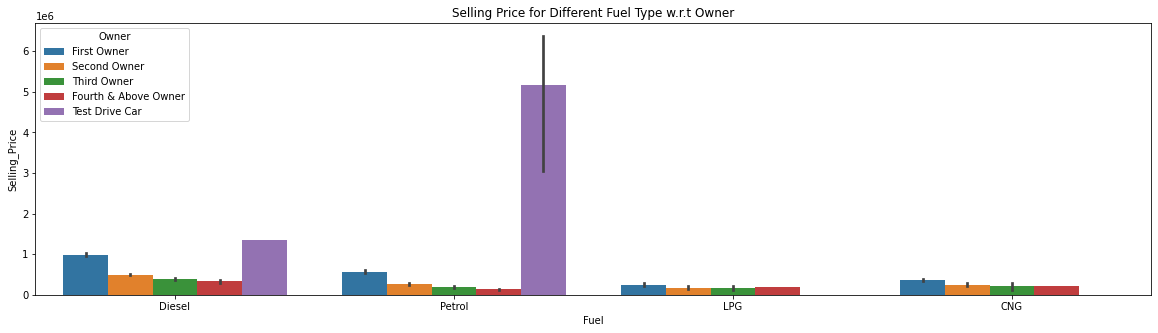

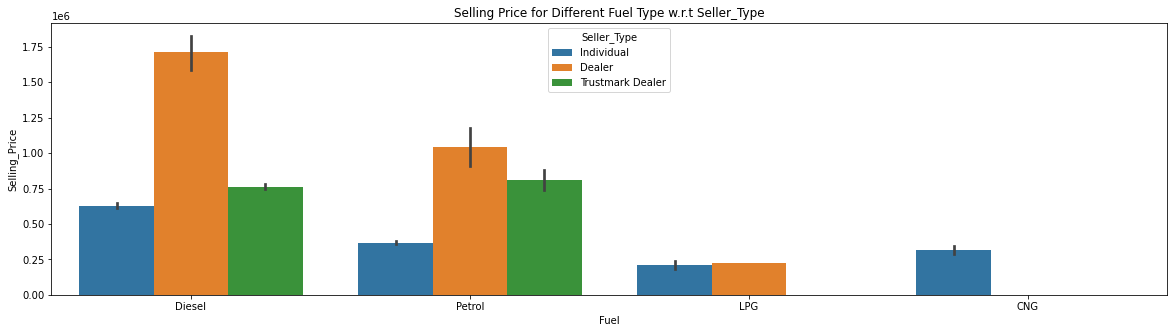

In [40]:
# fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(20,10))
# axes[0,0].scatter(x='Fuel',y='Selling_Price',data=car_data[car_data['Sold']=='Y'],color='green')
# axes[0,0].set_xlabel('Fuel_Type')
# axes[0,0].set_ylabel('Selling_Price')
# axes[0,0].set_title('Fuel_Type Vs Selling_Price',fontsize=20)

# sns.barplot(x=car_data_vis['Fuel'],y=car_data_vis['SP_in_Lakhs'],hue=car_data_vis['Seller_Type'],data=car_data_vis.query("Sold=='Y'"))
# plt.title('Selling Price for Different Fuel Type w.r.t Seller_Type')
# axes[0,1].scatter(x='Transmission',y='Selling_Price',data=car_data[car_data['Sold']=='Y'],color='blue')
# axes[0,1].set_xlabel('Transmission')
# axes[0,1].set_ylabel('Selling_Price')
# axes[0,1].set_title('Transmission Vs Selling_Price',fontsize=20)

# axes[1,0].scatter(x='Owner',y='Selling_Price',data=car_data[car_data['Sold']=='Y'],color='red')
# axes[1,0].set_xlabel('Owner')
# axes[1,0].set_ylabel('Selling_Price')
# axes[1,0].set_title('Owner Vs Selling_Price',fontsize=20)

# axes[1,1].scatter(x='Year',y='Selling_Price',data=car_data[car_data['Sold']=='Y'],color='purple')
# axes[1,1].set_xlabel('year')
# axes[1,1].set_ylabel('Selling_Price')
# axes[1,1].set_title('Year Vs Selling_Price',fontsize=20)

# fig.tight_layout()
# sns.color_palette("pastel")
plt.figure(figsize=(20,5))
sns.barplot(x=car_data['Fuel'],y=car_data['Selling_Price'],hue=car_data['Owner'],data=car_data.query("Sold=='Y'"))
plt.title('Selling Price for Different Fuel Type w.r.t Owner')
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x=car_data['Fuel'],y=car_data['Selling_Price'],hue=car_data['Seller_Type'],data=car_data.query("Sold=='Y'"))
plt.title('Selling Price for Different Fuel Type w.r.t Seller_Type')
plt.show()

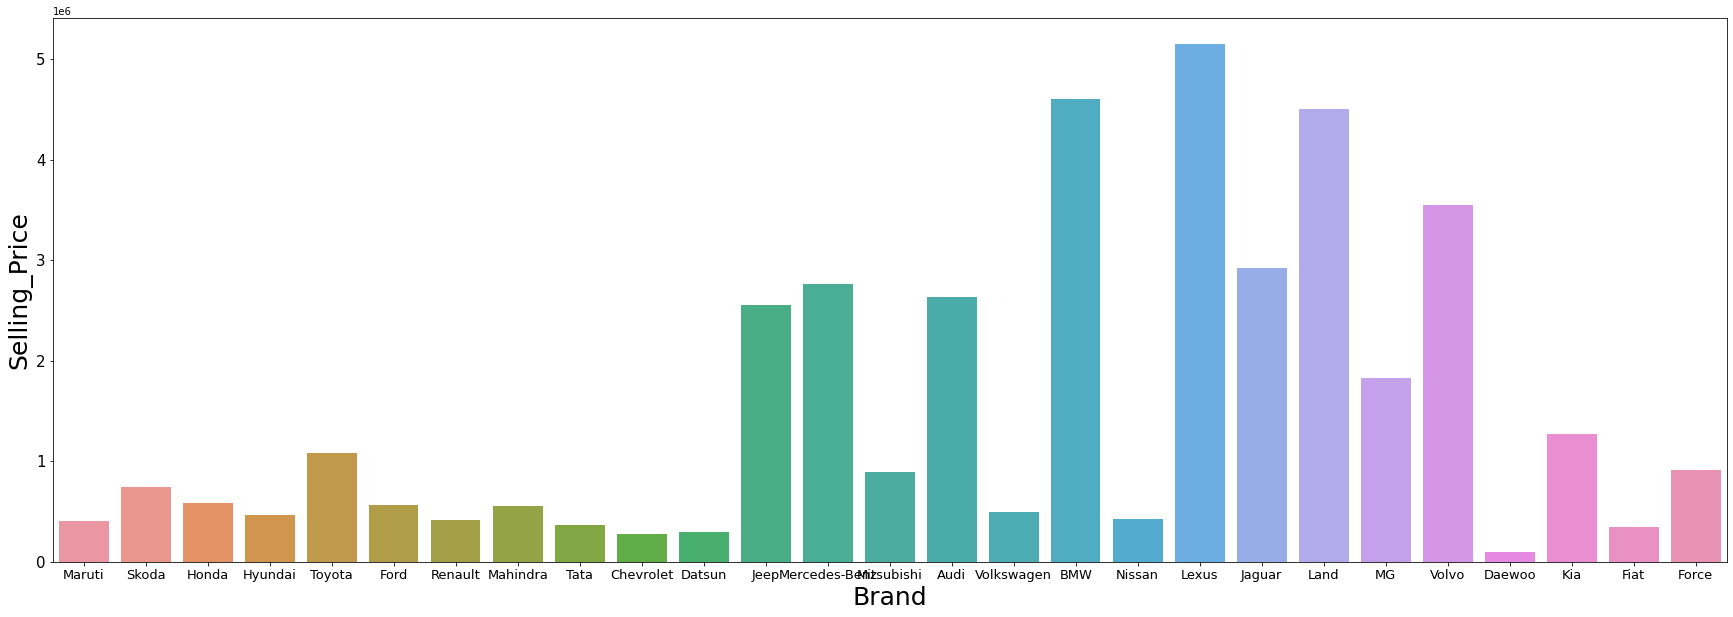

In [41]:
plt.figure(figsize=(30,10))
sns.barplot(x='Brand',y='Selling_Price',data=car_data[car_data['Sold']=='Y'],estimator=np.mean,ci=None)
plt.xlabel('Brand',fontsize=25)
plt.ylabel('Selling_Price',fontsize=25)
plt.xticks(fontsize=13)
plt.yticks(fontsize=15)
fig.tight_layout()

<Figure size 1440x720 with 0 Axes>

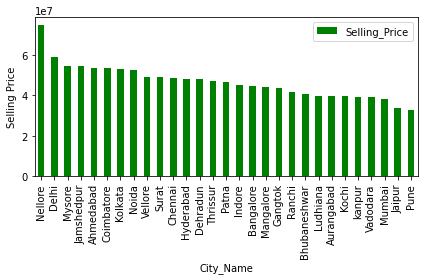

In [42]:

table = pd.pivot_table(data=car_data.query("Sold=='Y'"),index=['City_Name'],aggfunc={'Selling_Price':np.sum}).sort_values('Selling_Price',ascending=False)
plt.figure(figsize=(20,10))
table.plot(kind='bar',color='green')

plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()
# print(table)

In [43]:
car_data.isnull().sum()

Sales_ID         0
Name             0
Year             0
Selling_Price    0
km_Driven        0
City_Code        0
State_Code       0
Postal_Code      0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
Mileage          0
Engine           0
Max_Power        0
Seats            0
City_Name        0
Region_Code      0
Sold             0
State_Name       0
Region           0
Mileage_float    0
Power            0
Engine_cc        0
Brand            0
Engine_cc_bin    0
dtype: int64

C:\Users\lbansal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price'>

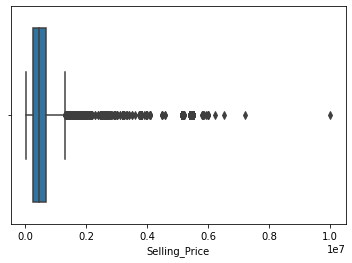

In [44]:
sns.boxplot(car_data['Selling_Price'])

C:\Users\lbansal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price'>

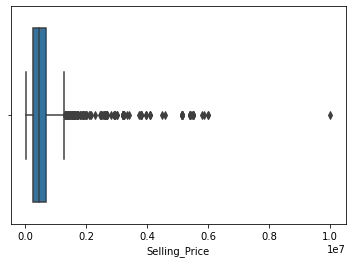

In [45]:
bp = sns.boxplot(car_data.query("Sold == 'Y'")['Selling_Price'])
bp